In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from pycocotools.coco import COCO
from skimage.io import imread

Using TensorFlow backend.


In [2]:
model_dir = '../models/base_mask_rcnn_coco'
model_path = '{}/mask_rcnn_coco.h5'.format(model_dir)
data_dir = '../data'
data_type = 'val2017'

In [3]:
coco = COCO('{}/raw/annotations/instances_{}.json'.format(data_dir, data_type))
category_ids = coco.getCatIds()
categories = sorted(coco.loadCats(category_ids), key=lambda x: x['id'])
class_names = ['background'] + list(map(lambda x: x['name'], categories))

loading annotations into memory...
Done (t=0.91s)
creating index...
index created!


In [4]:
class CocoConfig(Config):
    """Configuration for training on MS COCO.
    Derives from the base Config class and overrides values specific
    to the COCO dataset.
    """
    # Give the configuration a recognizable name
    NAME = "coco"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 80  # COCO has 80 classes

config = CocoConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [5]:
model = MaskRCNN(mode='inference', config=config, model_dir=model_dir)
model.load_weights(model_path, by_name=True)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


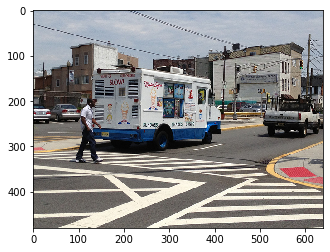

In [6]:
image_id = 393226
image_info = coco.loadImgs([image_id])[0]
image = imread('{}/raw/images/{}/{}'.format(data_dir, data_type, image_info['file_name']))
plt.imshow(image)

Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


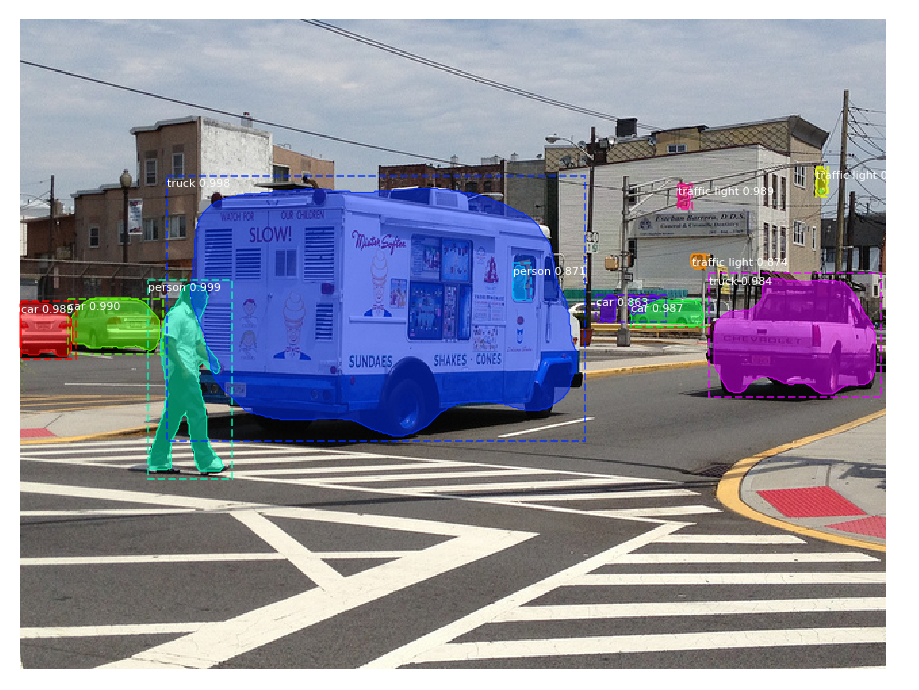

In [7]:
results = model.detect([image], verbose=1)
r = results[0]
display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                  class_names, r['scores'])
